In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# HR Analysis Case Study


## Основная информация

В этом наборе данных представлены сведения о работниках некоторой компании. Для каждого сотрудника указано:
- id - его идентификатор
- department - отдел
- region - регион
- education - ступень образования
- gender - пол
- recruitment_channel - канал найма
- no_of_trainings - количество пройденных тренингов
- age -  возраст
- previous_year rating - рейтинг сотрудника за прошлый год
- length_of_service - стаж работы
- KPIs_met > 80 % - ключевые показатели эффективности выше 80 % ? 
- awards_won ? - выигрывал ли награды?
- avg_training_score - средний балл на тренингах 
- is_promoted - был ли повышен в должности?

Задача: построить модель, предсказывающую на основе текущих данных, был ли он повышен в должности.

In [33]:
data = pd.read_csv('train.csv')
data.shape

(54808, 14)

In [34]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [35]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [36]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [38]:
data.index

RangeIndex(start=0, stop=54808, step=1)

#### Характиристики для всех числовых признаков

In [39]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


#### Xарактиристики для всех категориальных признаков.

In [40]:
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


## Визуализация данных

In [41]:
sns.set(style = 'white', rc={'figure.figsize':(10, 6)})

### Поло-возрастной состав компании.

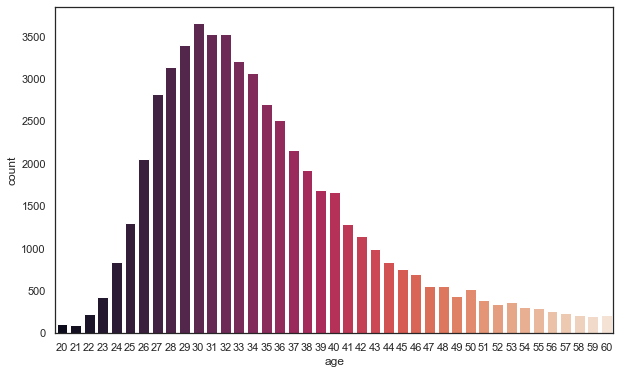

In [42]:
sns.countplot(x='age', data=data, palette ='rocket')
pass

Возраста сотрудников начинаются с 20 лет и ограничиваются 60.

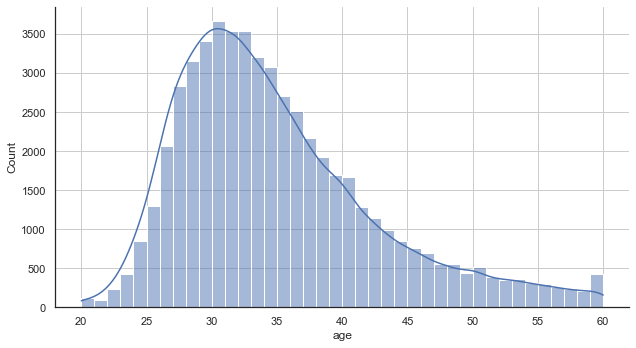

In [43]:
sns.displot(data['age'], bins=40, kde = True, aspect = 1.8)
plt.grid()
pass

In [44]:
data['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [45]:
 data['gender'].unique().tolist()

['f', 'm']

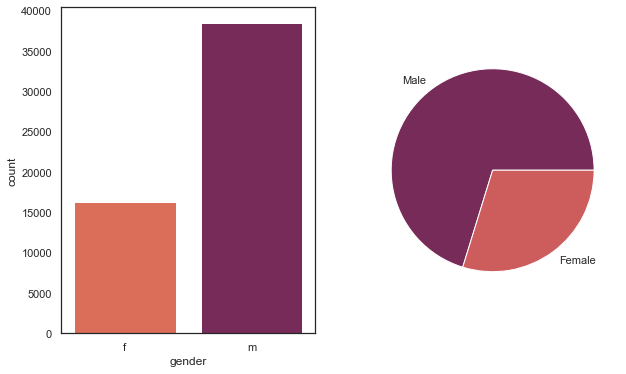

In [46]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='gender', data=data, palette="rocket_r", ax=ax[0])
plt.pie(data['gender'].value_counts(), labels = ['Male', 'Female'], colors = [(119/255,43/255,88/255), 'indianred'])
pass

Сотрудников-мужчин почти в 2.4 раза больше, чем сотрудников-женщин.

### Уровень образования сотрудников

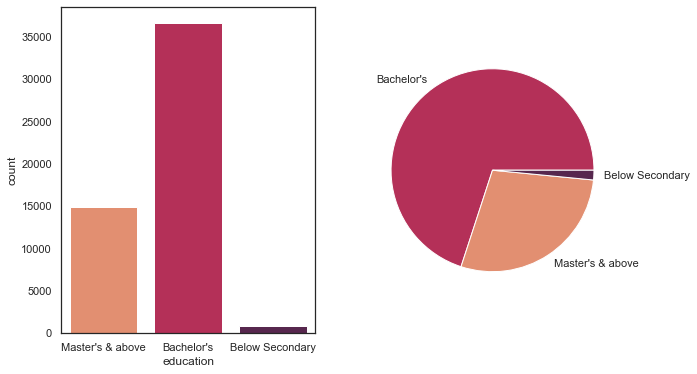

In [47]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='education', data=data,  palette="rocket_r", ax = ax[0])
plt.pie(data['education'].value_counts(), labels = ["Bachelor's", "Master's & above",'Below Secondary'], colors = [(180/255, 48/255, 88/255), (226/255, 143/255, 113/255), (87/255, 39/255, 78/255)])
pass

In [48]:
data['education'].unique().tolist()

["Master's & above", "Bachelor's", nan, 'Below Secondary']

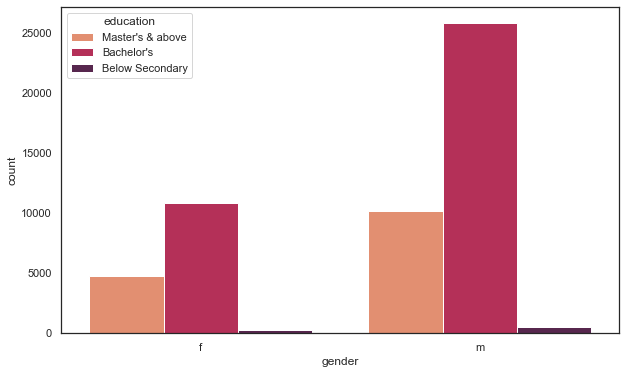

In [49]:
sns.countplot(x='gender', hue = 'education', data=data, palette="rocket_r")
pass

Для женщин и мужчин распредление уровней образования почти одинаковое (с поправкой на количество тех и других)

Найдем самого часто встрещающегося сотрудника в компании:

In [50]:
data[['department','gender','education', 'age']].mode()

,department,gender,education,age
0,Sales & Marketing,m,Bachelor's,30


Им оказался мужчина 30 лет, со степенью бакалавра, работающий в отделе продаж и маркетинга.

### Диаграмма занятости по отраслям

В компаннии 9 различных департаментов.

In [51]:
data['department'].nunique()

9

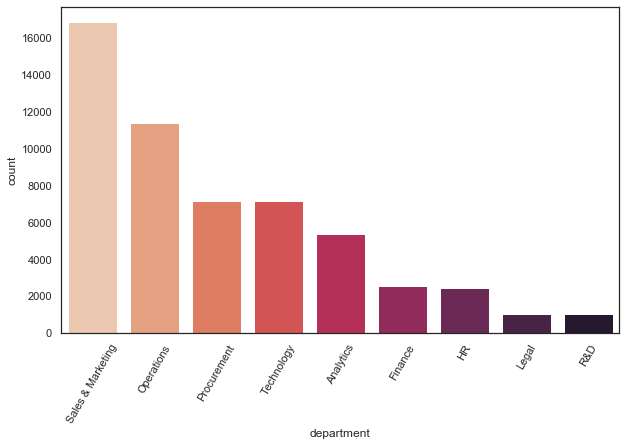

In [52]:
sns.countplot(x='department', order=data['department'].value_counts().index,  data=data, palette = 'rocket_r')
plt.xticks(rotation = 60)
pass

Наибольшее число сотрудников компании занято в продажах и маркетинге. Следующий за ним по численности отдел - управления операциями (операционный менеджмемнт) - отдел отвечающий за контроль эффективности производства и товаров и услуг. 
Самыми немногочисленными отделами же являются юридический и исследования и разработки. 
Посмотрим на распределение возрастов по каждому отделу

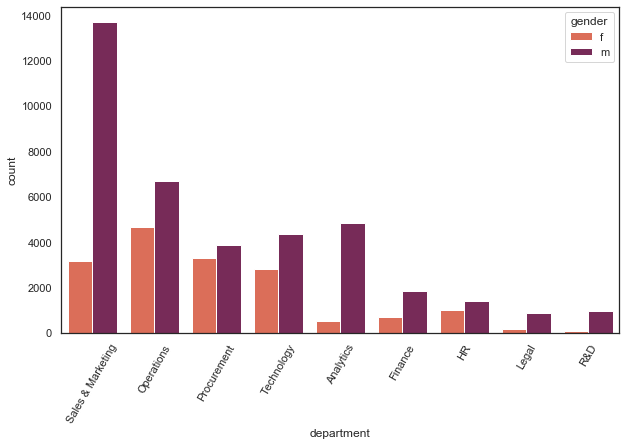

In [53]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue ='gender', palette = 'rocket_r', data=data)
plt.xticks(rotation = 60)
pass

In [54]:
data[data['department'] == 'R&D']['gender'].value_counts()

m    942
f     57
Name: gender, dtype: int64

За счет большего количества мужчин в компании, в каждом отделе преобладают сотрудники мужчины. В отделе закупок и службе HR количество женщин приближается к количеству мужчин. В юридическом и R&D женщины почти отсутствуют.

#### Распределение сотрудников с разным уровнем образования по отраслям

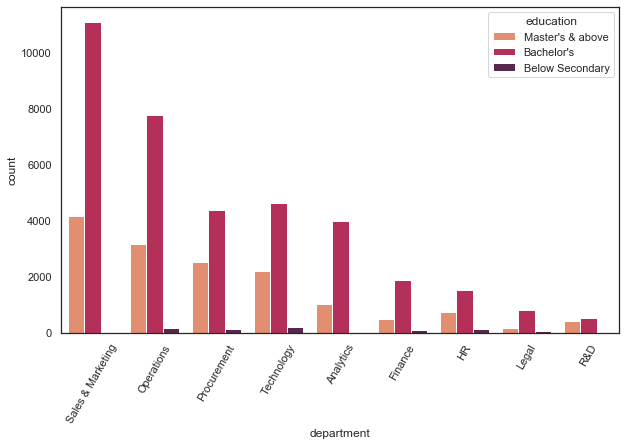

In [55]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue ='education', palette = 'rocket_r', data=data)
plt.xticks(rotation = 60)
pass

#### Распределение возрастов сотрудников по отраслям

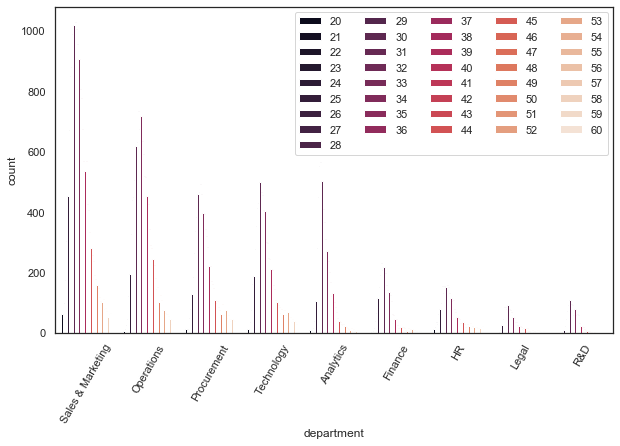

In [56]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue = 'age', palette="rocket", data=data)
plt.legend(ncol=5, loc='upper right')
plt.xticks(rotation = 60)
pass

В каждом отделе преобладает число сотрудников среднего возраста. Найдем медианы и моды возрастов по отделам.

In [57]:
data['age'].mean()

34.80391548679025

In [58]:
data[['department', 'age']].mode()

,department,age
0,Sales & Marketing,30


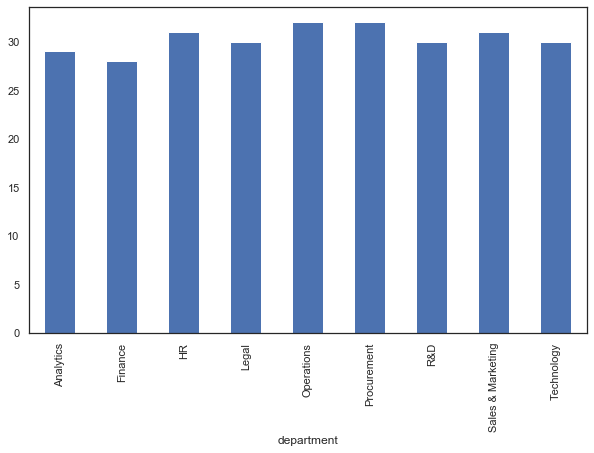

In [59]:
data.groupby('department')['age'].agg(pd.Series.mode).plot.bar()
pass

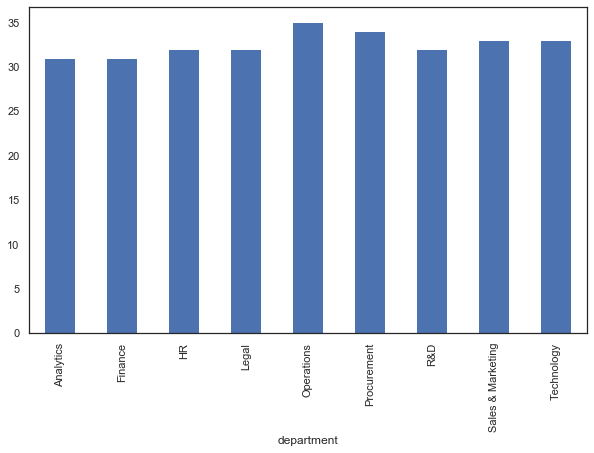

In [60]:
data.groupby('department')['age'].agg(pd.Series.median).plot.bar()
pass

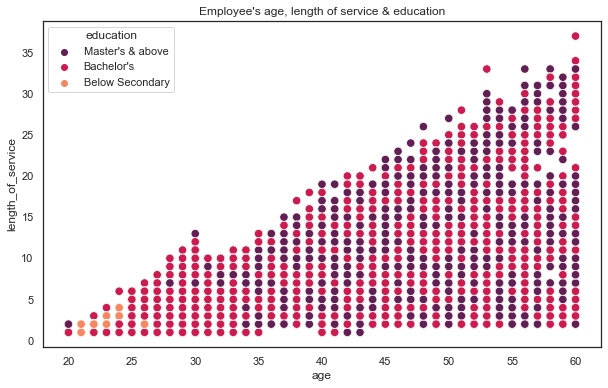

In [61]:
# adding a matplotlib parameters to seaborn functions
sns.scatterplot(data=data, x='age', y='length_of_service',  hue='education', palette ='rocket', s=70) 
plt.title("Employee's age, length of service & education")
pass

Очевидно, присутствует зависимость между возрастом и стажем работы.

На графике ниже можно увидеть, что люди без высшего образования в основном младше 30 лет.

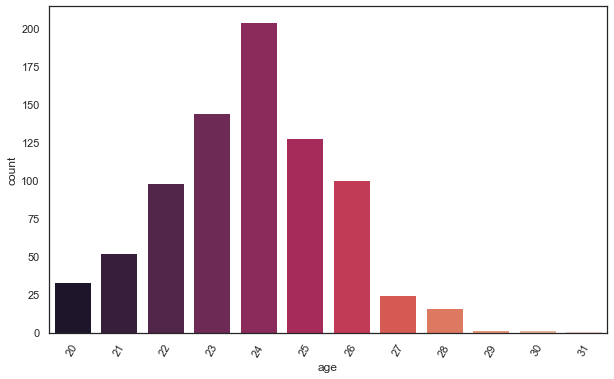

In [62]:
tmp = data[data['education'] == 'Below Secondary']
sns.countplot(x = 'age',  palette="rocket", data=tmp)
plt.xticks(rotation = 60)
pass

### Занятость по регионам

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


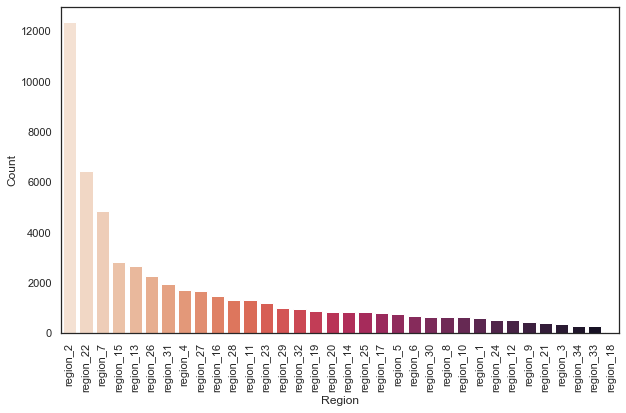

In [63]:
sns.countplot(data['region'], order=data['region'].value_counts().index, palette ='rocket_r')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [64]:
data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

Примерно четверть всех сотрудников компании работают в регионе №2.

### Диаграммы рассеивания для каждой пары переменных

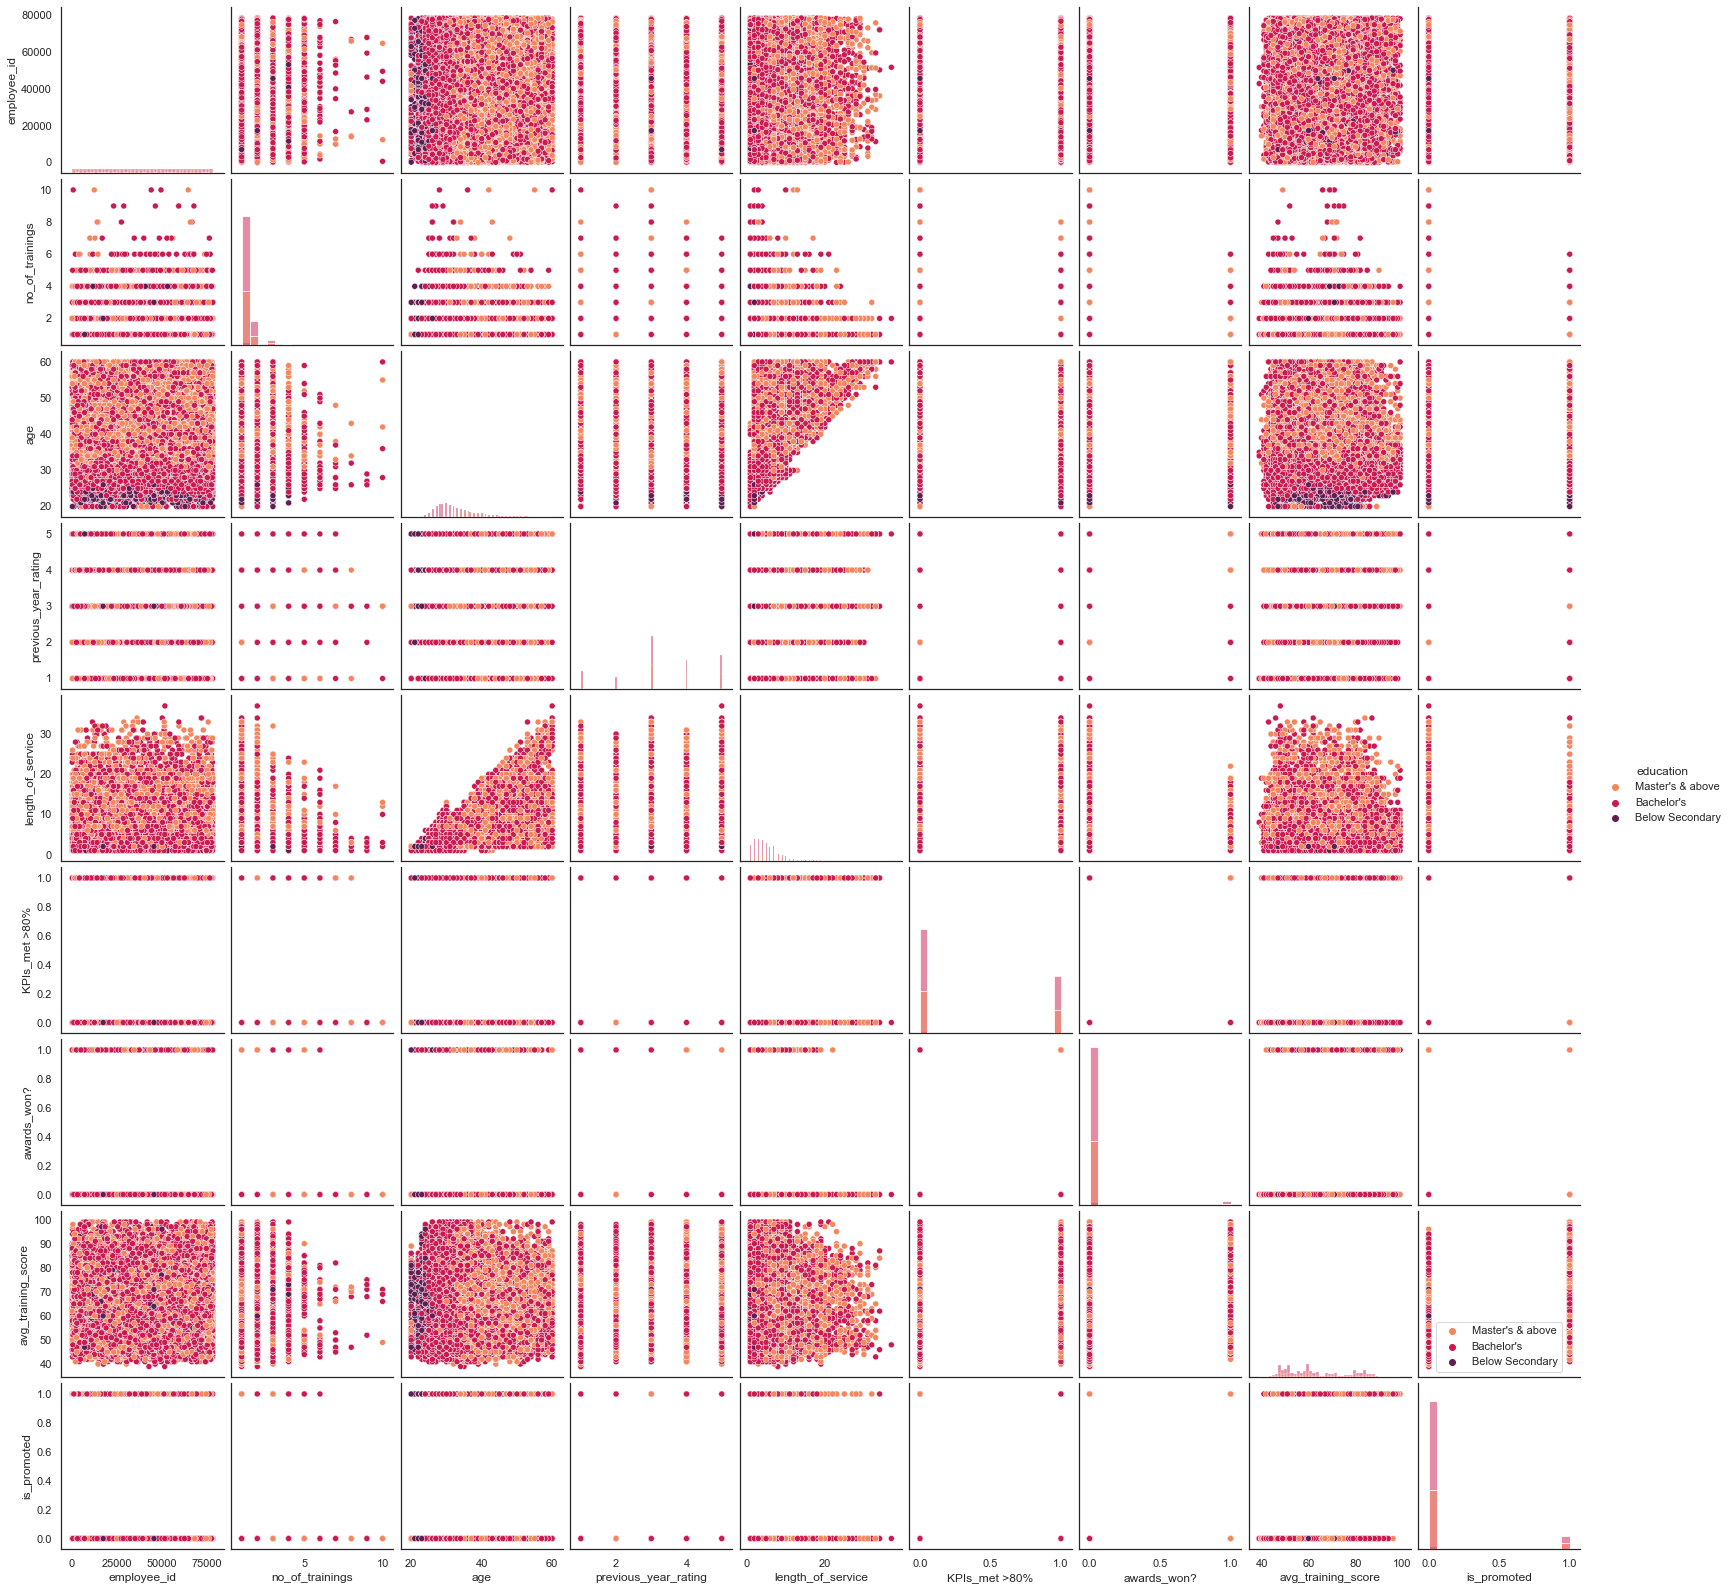

In [65]:
sns.pairplot(data, hue='education', diag_kind='hist', palette = 'rocket_r')
plt.legend()
pass

#### Графики распределения для каждого числового признака

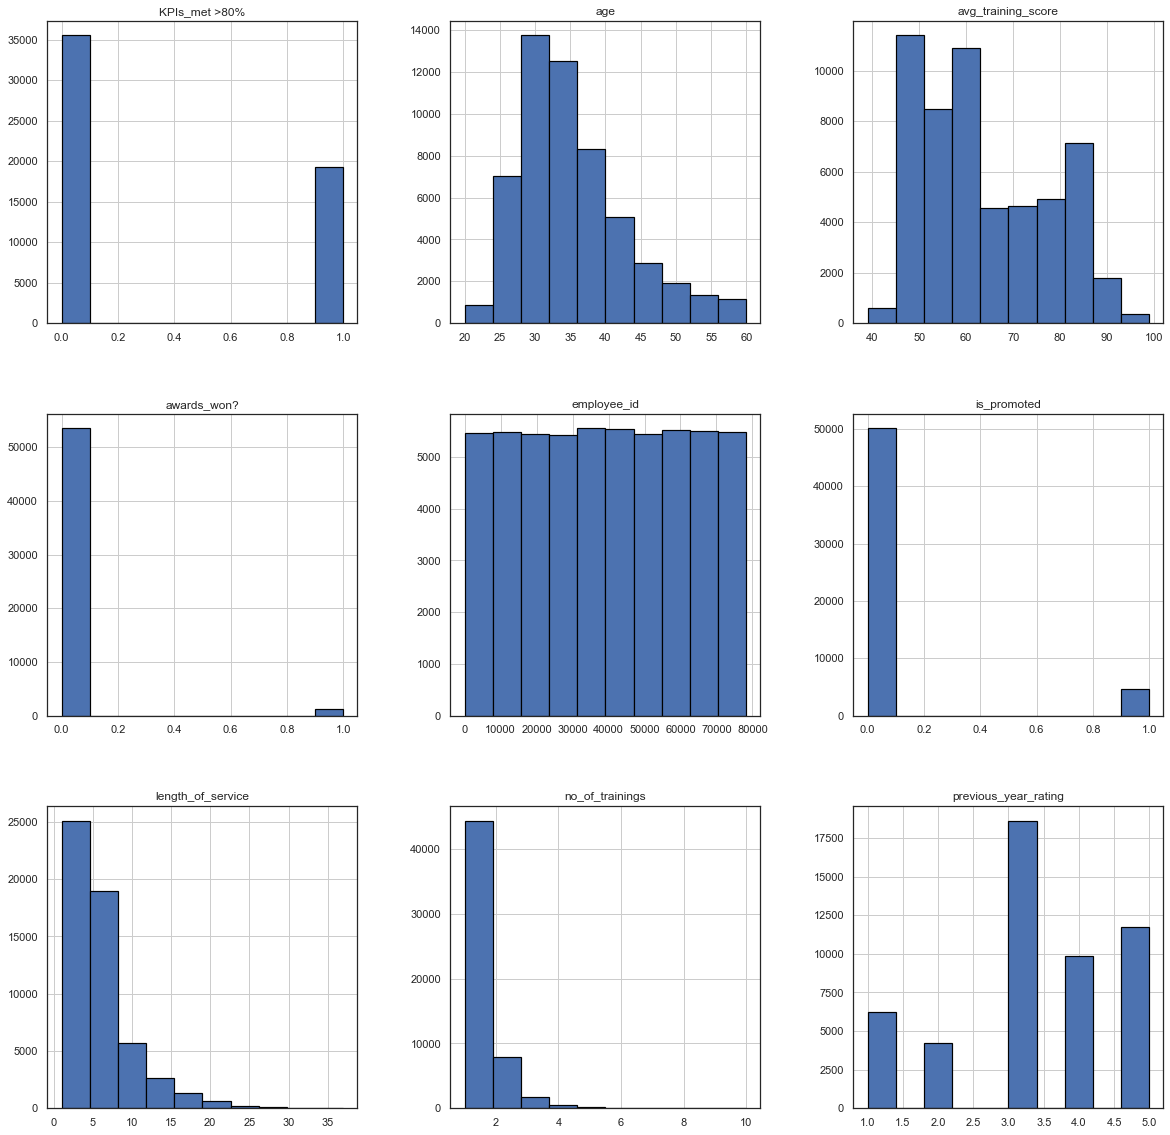

In [66]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [67]:
data['length_of_service'].value_counts(bins=4)

(0.963, 10.0]    48922
(10.0, 19.0]      5240
(19.0, 28.0]       560
(28.0, 37.0]        86
Name: length_of_service, dtype: int64

In [68]:
data['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

Из этих графиков видно, что:
- Примерно две трети сотрудников имеют ключевые показтели производительности (KPI) ниже  80%
- Абсолютное большинсвто никогда не выигрывали награды
- Стаж работы в компании у большинства ( 48922) до 10 лет, что достаточно легко объясняется возрастом среднего работника (30 лет)
- Всего 646 сотрудников имеют стаж больше 19 лет
- Большинство сотрудников ( > 40000) прошли только один тренинг.

Распределение для количество сотрудников с разным стажем работы напоминает экспоненциальное распределение.

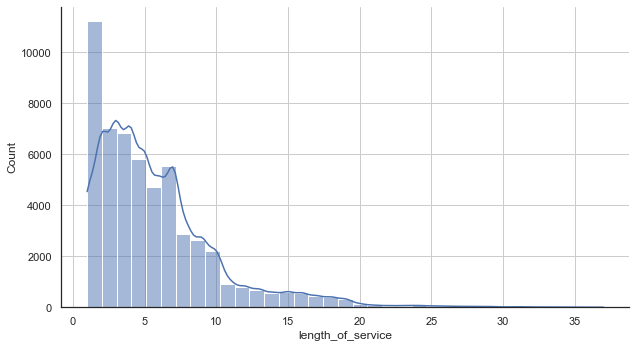

In [69]:
sns.displot(data['length_of_service'], bins=35, kde = True, aspect = 1.8)
plt.grid()
pass

В данном случае средний балл за тренинги обладает мультимодальным распределением.

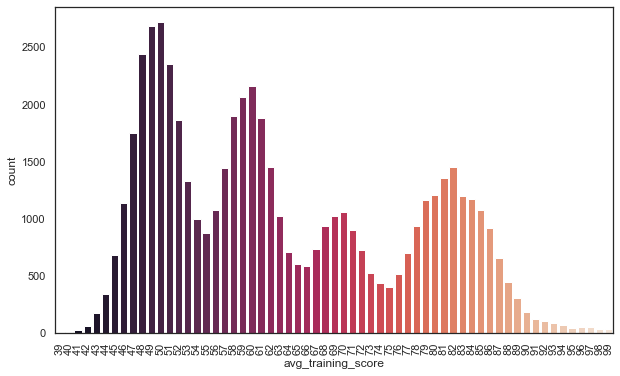

In [70]:
sns.countplot(x='avg_training_score', data=data, palette ='rocket')
plt.xticks(rotation = 90)
pass

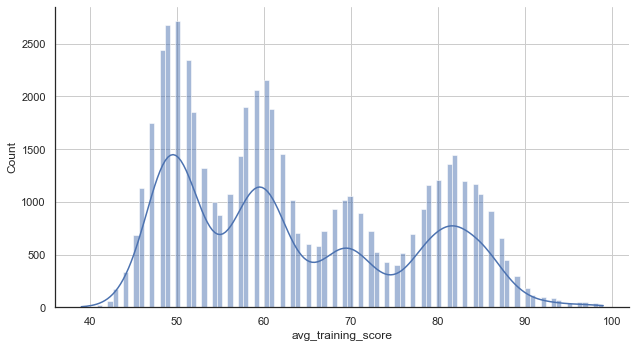

In [71]:
sns.displot(data['avg_training_score'], bins=100, kde = True, aspect = 1.8)
plt.grid()
pass

### Корреляционная матрица

In [72]:
corr_mat = data.corr()
corr_mat

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [73]:

corr_mat > 0.5

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,True,False,False,False,False,False,False,False,False
no_of_trainings,False,True,False,False,False,False,False,False,False
age,False,False,True,False,True,False,False,False,False
previous_year_rating,False,False,False,True,False,False,False,False,False
length_of_service,False,False,True,False,True,False,False,False,False
KPIs_met >80%,False,False,False,False,False,True,False,False,False
awards_won?,False,False,False,False,False,False,True,False,False
avg_training_score,False,False,False,False,False,False,False,True,False
is_promoted,False,False,False,False,False,False,False,False,True


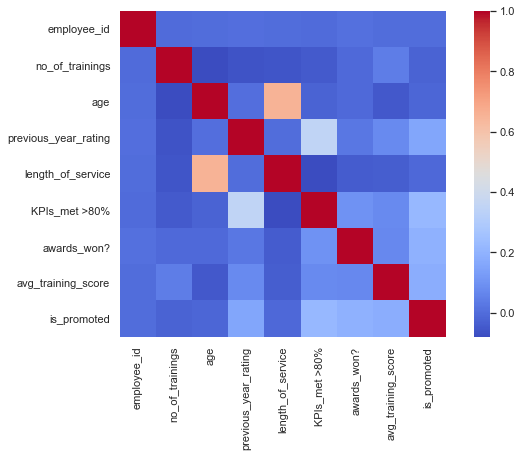

In [74]:
sns.heatmap(data.corr(), square=True, cmap='coolwarm')
pass

Ожидаемо присутствует корреляция между стажем работы и возрастом. Между остальными признаками явной корреляции не наблюдается. 

### Связь разных характеристик и повышения в должности


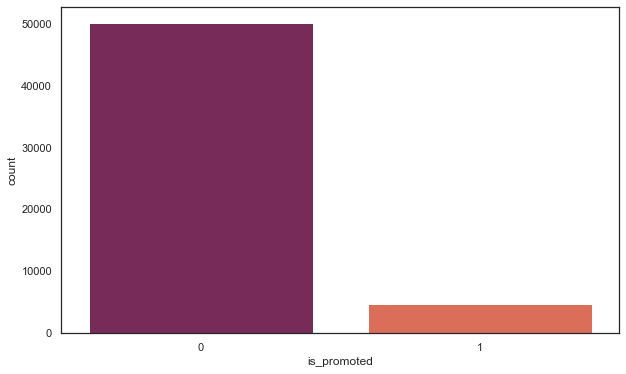

In [75]:
sns.countplot(x='is_promoted', palette = 'rocket', data = data)
pass

In [76]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [77]:
4668 / 54808

0.08517004816815063

Только 8.52 % сотрудников из всей выборки получили повышение в компании.

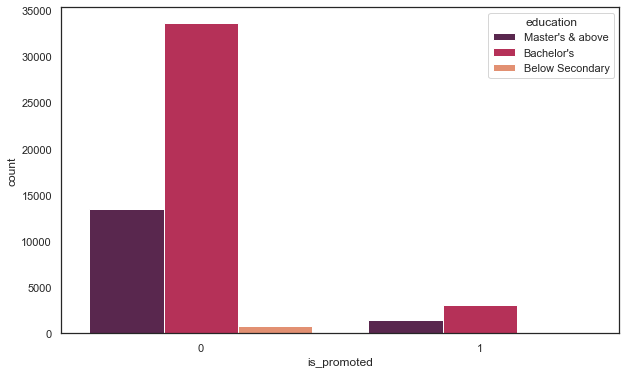

In [78]:
sns.countplot(x='is_promoted', hue = 'education', palette = 'rocket', data = data)
pass

In [79]:
data[data['is_promoted'] == 1]['education'].value_counts()

Bachelor's          3008
Master's & above    1471
Below Secondary       67
Name: education, dtype: int64

In [80]:
data[data['is_promoted'] == 0]['education'].value_counts()

Bachelor's          33661
Master's & above    13454
Below Secondary       738
Name: education, dtype: int64

Из графика ниже видно, что доля получивших повышение со степенью магистра, выше чем не получивших. Среди людей без высшего образования доли получивших и не получивших повышения одинаковы - значит здесь влияет другой фактор. То есть можно сделать вывод, что более высокий уровень образования повышает шансы на продвижение в должности.

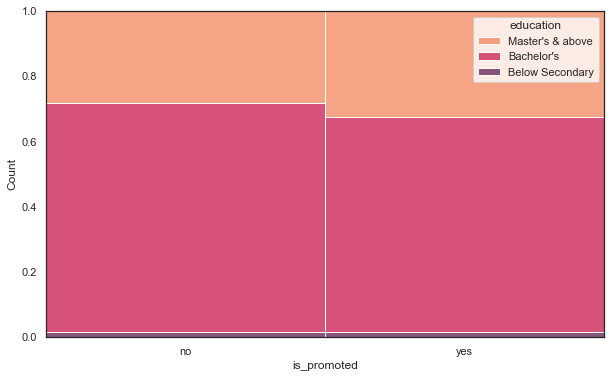

In [81]:
sns.histplot(x='is_promoted', hue = 'education', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
pass

Что влияет на получение повышения у людей без высшего образования? Например, выигрыш наград, высокий коэффициент эффективности.

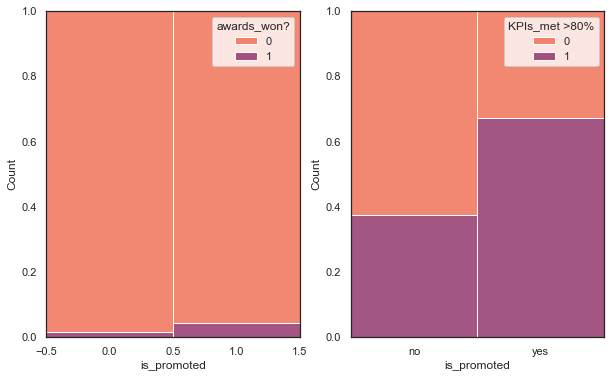

In [82]:
fig, ax =plt.subplots(1,2)
sns.histplot(x='is_promoted', hue = 'awards_won?', data = data[data['education'] == 'Below Secondary'], multiple = 'fill', palette = 'rocket_r', discrete=True, ax = ax[0])
plt.xticks([0,1], ['no', 'yes'])

sns.histplot(x='is_promoted', hue = 'KPIs_met >80%', data = data[data['education'] == 'Below Secondary'], multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
pass

Если смотреть среди всех сотрудник, то и тут у тех, кого повысили, существенно выше доля выигрывавших награды и с высоким показателем эффективности.

NameError: name 'test_d' is not defined

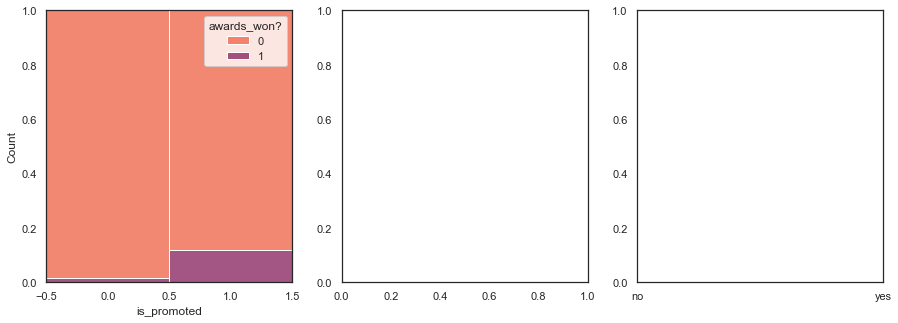

In [83]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.histplot(x='is_promoted', hue = 'awards_won?', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True, ax = ax[0])
plt.xticks([0,1], ['no', 'yes'])
sns.histplot(x='is_promoted', hue = 'previous_year_rating', data = test_d, multiple = 'fill', palette = 'rocket_r', discrete=True, ax = ax[1])
plt.xticks([0,1], ['no', 'yes'])
sns.histplot(x='is_promoted', hue = data['KPIs_met >80%'], data = data, multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
pass

Влияет ли пол на повышение? Как видим, среди всех, кого повысили лишь несущественно выше доля женщин. Так что пол не влияет на повышение 

In [ ]:
sns.histplot(x='is_promoted', hue = 'gender', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
pass

#### Два способа посчитать количество людей работающих в разных отделах

In [160]:
data.groupby('department')['employee_id'].count()

department
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
Operations           11348
Procurement           7138
R&D                    999
Sales & Marketing    16840
Technology            7138
Name: employee_id, dtype: int64

In [161]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

## Заполняем пропущенные значения

In [162]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [163]:
data.fillna(data.median(axis = 0), axis = 0, inplace = True)

In [164]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [165]:
data['education'].fillna(data['education'].mode().iloc[0], inplace = True)

In [166]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Обработка категориальных признаков

In [167]:
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


## gender

In [168]:
data['gender'] = pd.factorize(data['gender'])[0]

In [169]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


## department

In [170]:
dummies_departments = pd.get_dummies(data['department'])

In [171]:
dummies_departments.shape

(54808, 9)

In [172]:
dummies_departments.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [173]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


In [174]:
data = pd.concat((data, dummies_departments), axis=1)
data = data.drop(['department'],  axis=1)

In [175]:
data.head()

,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,...,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,65438,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,...,0,0,0,0,0,0,0,0,1,0
1,65141,region_22,Bachelor's,1,other,1,30,5.0,4,0,...,0,0,0,0,0,1,0,0,0,0
2,7513,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,...,0,0,0,0,0,0,0,0,1,0
3,2542,region_23,Bachelor's,1,other,2,39,1.0,10,0,...,0,0,0,0,0,0,0,0,1,0
4,48945,region_26,Bachelor's,1,other,1,45,3.0,2,0,...,0,0,0,0,0,0,0,0,0,1


## region

In [176]:
dummies_region = pd.get_dummies(data['region'])
data = pd.concat((data, dummies_region), axis=1)
data = data.drop(['region'],  axis=1)

In [177]:
data.head()

,employee_id,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,Master's & above,0,sourcing,1,35,5.0,8,1,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,Bachelor's,1,other,1,30,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,Bachelor's,1,sourcing,1,34,3.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,Bachelor's,1,other,2,39,1.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,Bachelor's,1,other,1,45,3.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


## education

In [178]:
dummies_education = pd.get_dummies(data['education'])
data = pd.concat((data, dummies_education), axis=1)
data = data.drop(['education'],  axis=1)

In [179]:
data.head()

,employee_id,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,region_34,region_4,region_5,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above
0,65438,0,sourcing,1,35,5.0,8,1,0,49,...,0,0,0,0,1,0,0,0,0,1
1,65141,1,other,1,30,5.0,4,0,0,60,...,0,0,0,0,0,0,0,1,0,0
2,7513,1,sourcing,1,34,3.0,7,0,0,50,...,0,0,0,0,0,0,0,1,0,0
3,2542,1,other,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,0,1,0,0
4,48945,1,other,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,1,0,0


## recruitment_channel	

In [180]:
dummies_recruitment_channel = pd.get_dummies(data['recruitment_channel'])
data = pd.concat((data, dummies_recruitment_channel), axis=1)
data = data.drop(['recruitment_channel'],  axis=1)

In [181]:
data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,1,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,1,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,1,0,0,1,0,0


# Подготовка тестовой и тренировочной выборок

Обработку всех категориальных признаков можно сделать в одну строчку:

In [2]:
train = pd.read_csv('train.csv')
train.fillna(train .median(axis = 0), axis = 0, inplace = True)
train['education'].fillna(train ['education'].mode().iloc[0], inplace = True)
x_train = pd.get_dummies(train)
x_train.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region

In [3]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [4]:
x_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0


#### Заметим, что в данном случае метод 'one hot encoding' применяется и к бинарному признаку gender.

# Отбор признаков
Признак employee id не несет никакой содержательной информации для решаемой задачи, поэтому его можно исключить из тренировочной и тестовой выборок, предварительно сохранив в отдельную переменную

In [5]:
emp_id = x_train['employee_id']
x_train = x_train.drop(['employee_id'], axis = 1)
x_train.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_r

# Разделение выборки на x и y

Выделяем столбец is_promoted - то что будем предсказывать

In [6]:
y = x_train[['is_promoted']]
x = x_train.drop(['is_promoted'], axis=1)
print("x:", x.shape)
print("y:", y.shape)

x: (54808, 58)
y: (54808, 1)


In [7]:
y.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


# Борьба с несбалансированными классами

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


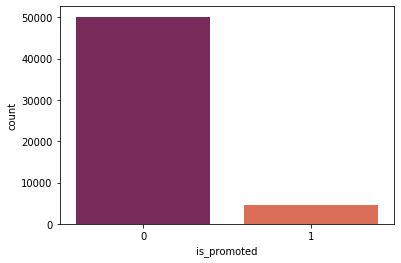

In [8]:
sns.countplot('is_promoted', data = y, palette = 'rocket')
pass

In [9]:
from imblearn.over_sampling import SMOTE

x_ext, y_ext = SMOTE().fit_sample(x, y.values.ravel())
x_ext = pd.DataFrame(x_ext)
y_ext = pd.DataFrame(y_ext)
print("x extended :", x_ext.shape)
print("y extended :",y_ext.shape)


x extended : (100280, 58)
y extended : (100280, 1)


In [10]:
y_ext.head()

,0
0,0
1,0
2,0
3,0
4,0


c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


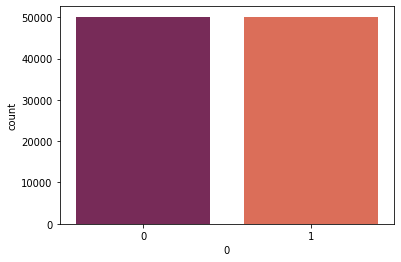

In [11]:
sns.countplot(0, data = y_ext, palette = 'rocket')
pass

# Разделение выборки на тренировочную и тестовую

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_ext, y_ext, test_size = 0.2, random_state = 31)

print("x_train: ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (80224, 58)
x_test  (20056, 58)
y_train:  (80224, 1)
y_test:  (20056, 1)


# Нормализация количественных признаков

Воспользуемся стандартизацией данных - линейным преобразованием, приводящим все значения к нулевому среднему и единичному стандартному отклонению.

In [13]:
sc = sklearn.preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [14]:
x_test = pd.DataFrame(x_test)
x_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,...,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000,20056.000000
mean,-0.000998,0.007040,-0.001411,-0.005981,0.002676,0.005978,-0.000109,-0.003466,0.002234,-0.001086,...,0.004475,-0.004790,-0.004161,0.008415,0.009839,0.007371,-0.002327,-0.000997,0.003877,0.005417
std,0.985619,1.009687,0.998363,0.989788,1.000229,1.017740,0.993954,0.994988,1.006063,0.996816,...,1.026984,0.962820,1.001344,1.039508,1.005891,1.004446,1.000757,1.000006,1.016665,1.001647
min,-0.339008,-1.962306,-2.264262,-1.129790,-0.925229,-0.162665,-1.849876,-0.311770,-0.178493,-0.164992,...,-0.081318,-0.065336,-1.368968,-0.103299,-0.564798,-0.563895,-1.364691,-0.981327,-0.113988,-0.742376
25%,-0.339008,-0.739827,-0.517918,-0.645349,-0.925229,-0.162665,-0.888833,-0.311770,-0.178493,-0.164992,...,-0.081318,-0.065336,-1.368968,-0.103299,-0.564798,-0.563895,-1.364691,-0.981327,-0.113988,-0.742376
50%,-0.339008,-0.196503,-0.201853,-0.160908,-0.925229,-0.162665,-0.202374,-0.311770,-0.178493,-0.164992,...,-0.081318,-0.065336,0.730477,-0.103299,-0.564798,-0.563895,0.732766,-0.981327,-0.113988,-0.742376
75%,-0.339008,0.482652,1.228425,0.323533,1.080813,-0.162665,0.895961,-0.311770,-0.178493,-0.164992,...,-0.081318,-0.065336,0.730477,-0.103299,-0.564798,-0.563895,0.732766,1.019028,-0.113988,1.347027
max,15.677821,3.470934,1.228425,6.863488,1.080813,6.147604,2.200234,3.207495,5.602461,6.060917,...,12.297467,15.305587,0.730477,9.680675,1.770546,1.773379,0.732766,1.019028,8.772860,1.347027


# Построение модели

## k ближайших соседей

In [18]:
from sklearn.neighbors import KNeighborsClassifier

## 1 ближайший сосед

In [19]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [26]:
print("Test accuracy :", knn.score(x_test, y_test))

Test accuracy : 0.9347327483047467


In [27]:
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))

Train accuracy : 0.9998254886318308
Test accuracy : 0.9347327483047467


## 3 ближайший соседей


In [28]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [29]:
print("Train accuracy :", knn.score(x_train, y_train))
print("Test accuracy :", knn.score(x_test, y_test))

Train accuracy : 0.9642874950139609
Test accuracy : 0.9426605504587156


# 11 ближайших соседей

In [30]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=11)

In [31]:
print("Train Accuracy :", knn.score(x_train, y_train))
print("Test Accuracy :", knn.score(x_test, y_test))

Train Accuracy : 0.9436328280813722
Test Accuracy : 0.9335859593139211


## Случайный лес

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

In [17]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train.values.ravel())
print("Train Accuracy :", rfc.score(x_train, y_train))
print("Test Accuracy :", rfc.score(x_test, y_test))

Train Accuracy : 0.999900279218189
Test Accuracy : 0.9611088950937375


# Выводы

### kNN
Классификатор kNN работает долго на имеющейся конфигурации ПК и данных размером 100 тысяч элементов. Обладает следующей точностью:

- 1 сосед 
  - Train accuracy : 99.98 %
  - Test accuracy : 93.47 %
- 3 соседа
  - Train accuracy : 96.43 %
  - Test accuracy : 94.27 %
- 11 соседей
  - Train Accuracy : 94.36 %
  - Test Accuracy : 93.36 %
  
Точность на обучающей выборке для одного соседа самая высокая, это объясняется __, на тестовой выборке точность у всех примерно одинаковая
  
### Случайный лес
Классификатор случайный лес дал точность на тренировочной выборке 99% и 96 % на тестовой.
Высокая точность предсказаний обусловлена в большей степени тем, что данный набор данных является учебным и был создан искуссветнно